CLONING SHAP-E

In [ ]:
!git clone https://github.com/openai/shap-e.git


Cloning into 'shap-e'...
remote: Enumerating objects: 336, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 336 (delta 35), reused 13 (delta 13), pack-reused 281 (from 2)
Receiving objects: 100% (336/336), 11.72 MiB | 19.18 MiB/s, done.
Resolving deltas: 100% (43/43), done.


SETTING UP SHAPE-E

In [ ]:
%cd shap-e
!pip install -e .


/content/shap-e
Obtaining file:///content/shap-e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-e5hdwhow/clip_4244bcaa09c8429d8bcffa24acbfc11e
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-e5hdwhow/clip_4244bcaa09c8429d8bcffa24acbfc11e
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=727bf9ec7c7befc5ee8289cc866bbab9d45660c9b695eae106b2652d0c6c03c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-xrb6rowf/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip
  Running setup.py develop for shap-e


GENERATING 3D MODEL WITH SHAP-E(with gif visualisation)

In [ ]:
import torch
from shap_e.diffusion.sample import sample_latents
from shap_e.diffusion.gaussian_diffusion import diffusion_from_config
from shap_e.models.download import load_model, load_config
from shap_e.util.notebooks import create_pan_cameras, decode_latent_images, gif_widget

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
xm = load_model('transmitter', device=device)
model = load_model('text300M', device=device)
diffusion = diffusion_from_config(load_config('diffusion'))

batch_size = 4
guidance_scale = 15.0
prompt = "a sword"

latents = sample_latents(
    batch_size=batch_size,
    model=model,
    diffusion=diffusion,
    guidance_scale=guidance_scale,
    model_kwargs=dict(texts=[prompt] * batch_size),
    progress=True,
    clip_denoised=True,
    use_fp16=True,
    use_karras=True,
    karras_steps=64,
    sigma_min=1e-3,
    sigma_max=160,
    s_churn=0,
)

render_mode = 'nerf'  # you can change this to 'stf'
size = 64  # this is the size of the renders; higher values take longer to render.

cameras = create_pan_cameras(size, device)
for i, latent in enumerate(latents):
    images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    display(gif_widget(images))

  0%|          | 0/64 [00:00<?, ?it/s]

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAALnOYrXQXLXQW7XNYrXLYLHLW7HLWrPKYazHYavDX6+6xa+6xK…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIYAALC4MK+4L6q1LqiyLnCUmG+Ul26UmW6UmG2Ul2+TmG+Tl26TmG…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAAL3cVr7bWbvZVbzYVbbZVbbYVbLYVrnXV7LWVrTQVrPQV7LOV7…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIYAAKizv6izvqezv6ezvqeyvqayvaaxvaaxvKWxvaWxvKWwvaWwvK…

INTERACTIVE TEXT TO 3D MODEL GENERATOR WITH GIF VISUALISATION

Installing required packages...
PyTorch already installed, skipping...
Uninstalling any existing pillow...
Installing trimesh...
trimesh installed and imported successfully.
Installing pillow...
pillow installed and imported successfully.
Cloning shap-e repository...
Installing shap-e...
Package installation complete!
Using device: cuda
Interactive 3D Model Generator
Enter a text prompt to generate a 3D model (e.g., 'a sword').
Use GPU in Colab for faster generation (~1min vs. 5-15min on CPU).
GIFs will be larger (128x128) and show multiple angles.
Type 'exit' to quit.
Enter a text prompt for 3D generation (or 'exit' to quit): a red sword
Enter guidance scale (default 15.0): 15
Enter number of steps (default 64): 64
Enter seed (default 42): 42
Generating 3D model for: 'a red sword' with guidance=15.0, steps=64, seed=42


  0%|          | 0/64 [00:00<?, ?it/s]

/content/shap-e/shap_e/models/stf/renderer.py:286: UserWarning: exception rendering with PyTorch3D: No module named 'pytorch3d'
  warnings.warn(f"exception rendering with PyTorch3D: {exc}")
/content/shap-e/shap_e/models/stf/renderer.py:287: UserWarning: falling back on native PyTorch renderer, which does not support full gradients
  warnings.warn(


Generated: outputs/a red sword_gs15.0_steps64_seed42_0.obj, outputs/a red sword_gs15.0_steps64_seed42_0.glb
Vertex count: 3622
Face count: 7232
Watertight: True
GIF saved: outputs/a red sword_gs15.0_steps64_seed42_0.gif


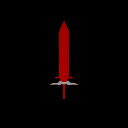

Generation complete! Check the 'outputs/' folder for OBJ, GLB, PNG, and GIF files.
Enter a text prompt for 3D generation (or 'exit' to quit): a car
Enter guidance scale (default 15.0): 12
Enter number of steps (default 64): 55
Enter seed (default 42): 38
Generating 3D model for: 'a car' with guidance=12.0, steps=55, seed=38


  0%|          | 0/55 [00:00<?, ?it/s]

Generated: outputs/a car_gs12.0_steps55_seed38_0.obj, outputs/a car_gs12.0_steps55_seed38_0.glb
Vertex count: 31980
Face count: 63932
Watertight: True
GIF saved: outputs/a car_gs12.0_steps55_seed38_0.gif


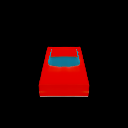

Generation complete! Check the 'outputs/' folder for OBJ, GLB, PNG, and GIF files.
Enter a text prompt for 3D generation (or 'exit' to quit): cricket bat
Enter guidance scale (default 15.0): 10
Enter number of steps (default 64): 60
Enter seed (default 42): 40
Generating 3D model for: 'cricket bat' with guidance=10.0, steps=60, seed=40


  0%|          | 0/60 [00:00<?, ?it/s]

Generated: outputs/cricket bat_gs10.0_steps60_seed40_0.obj, outputs/cricket bat_gs10.0_steps60_seed40_0.glb
Vertex count: 7916
Face count: 15820
Watertight: True
GIF saved: outputs/cricket bat_gs10.0_steps60_seed40_0.gif


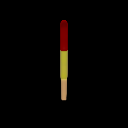

Generation complete! Check the 'outputs/' folder for OBJ, GLB, PNG, and GIF files.
Enter a text prompt for 3D generation (or 'exit' to quit): exit


In [ ]:
# Interactive Text-to-3D Model Generator with GIF Visualization
# Generates 3D models from text prompts using Shap-E, saves OBJ/GLB/PNG/GIF,
# and displays larger (128x128) GIFs with multiple angles.

import os
import subprocess
import sys
import re
import importlib.util
import torch

# Check if a package is installed
def is_package_installed(package_name):
    return importlib.util.find_spec(package_name) is not None

# Install required packages
def install_packages():
    print("Installing required packages...")
    try:
        # Install PyTorch (try 2.0.1 for Python 3.12 compatibility; fallback to latest if needed)
        if not is_package_installed("torch"):
            print("Installing PyTorch...")
            try:
                subprocess.run([sys.executable, "-m", "pip", "install", "torch==2.0.1", "--no-cache-dir"], check=True, capture_output=True, text=True)
            except subprocess.CalledProcessError as e:
                print(f"Failed to install torch==2.0.1: {e.stderr}")
                print("Trying latest torch version...")
                subprocess.run([sys.executable, "-m", "pip", "install", "torch", "--no-cache-dir"], check=True, capture_output=True, text=True)
        else:
            print("PyTorch already installed, skipping...")

        # Clean up existing pillow installation to avoid conflicts
        print("Uninstalling any existing pillow...")
        subprocess.run([sys.executable, "-m", "pip", "uninstall", "pillow", "-y"], check=False, capture_output=True, text=True)

        # Install trimesh and pillow with forced reinstall
        for pkg in ["trimesh", "pillow"]:
            print(f"Installing {pkg}...")
            try:
                subprocess.run([sys.executable, "-m", "pip", "install", "--no-cache-dir", "--force-reinstall", pkg], check=True, capture_output=True, text=True)
                # Verify import after installation
                if pkg == "pillow":
                    try:
                        from PIL import Image
                    except ImportError as e:
                        raise ImportError(f"PIL (pillow) installed but cannot import Image: {e}")
                elif pkg == "trimesh":
                    try:
                        import trimesh
                    except ImportError as e:
                        raise ImportError(f"trimesh installed but cannot be imported: {e}")
                print(f"{pkg} installed and imported successfully.")
            except subprocess.CalledProcessError as e:
                print(f"Error installing {pkg}: {e.stderr}")
                sys.exit(1)
            except ImportError as e:
                print(f"Error: {pkg} installation succeeded but import failed: {e}")
                sys.exit(1)

        # Install shap-e
        if not os.path.exists("shap-e"):
            print("Cloning shap-e repository...")
            subprocess.run(["git", "clone", "https://github.com/openai/shap-e.git"], check=True, capture_output=True, text=True)
        os.chdir("shap-e")
        print("Installing shap-e...")
        try:
            subprocess.run([sys.executable, "-m", "pip", "install", "-e", ".", "--no-cache-dir"], check=True, capture_output=True, text=True)
        except subprocess.CalledProcessError as e:
            print(f"Error installing shap-e: {e.stderr}")
            sys.exit(1)
        os.chdir("..")
        print("Package installation complete!")
    except subprocess.CalledProcessError as e:
        print(f"Error during package installation: {e.stderr}")
        sys.exit(1)
    except Exception as e:
        print(f"Unexpected error during installation: {e}")
        sys.exit(1)

# Run installation
install_packages()

# Import required modules after installation
try:
    from PIL import Image
    from IPython.display import Image as IPyImage, display  # For Colab GIF display
    import trimesh
    from shap_e.diffusion.sample import sample_latents
    from shap_e.diffusion.gaussian_diffusion import diffusion_from_config
    from shap_e.models.download import load_model, load_config
    from shap_e.util.notebooks import create_pan_cameras, decode_latent_images, decode_latent_mesh
except ImportError as e:
    print(f"Error importing required modules: {e}")
    sys.exit(1)

# Initialize models
try:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    xm = load_model('transmitter', device=device)
    model = load_model('text300M', device=device)
    diffusion = diffusion_from_config(load_config('diffusion'))
except Exception as e:
    print(f"Error loading models: {e}")
    sys.exit(1)

def sanitize_filename(prompt):
    """Replace invalid filename characters with underscores."""
    return re.sub(r'[^\w\s-]', '_', prompt.strip())

def generate_3d(prompt, guidance_scale=15.0, steps=64, seed=42, batch_size=1):
    try:
        torch.manual_seed(seed)

        latents = sample_latents(
            batch_size=batch_size,
            model=model,
            diffusion=diffusion,
            guidance_scale=guidance_scale,
            model_kwargs=dict(texts=[prompt] * batch_size),
            progress=True,
            clip_denoised=True,
            use_fp16=True,
            use_karras=True,
            karras_steps=steps,
            sigma_min=1e-3,
            sigma_max=160,
            s_churn=0,
        )

        render_mode = 'nerf'  # or 'stf'
        size = 128  # Increased to 128 for larger GIFs
        cameras = create_pan_cameras(size, device)  # Default angles for 360° rotation
        output_dir = "outputs"
        try:
            os.makedirs(output_dir, exist_ok=True)
        except Exception as e:
            print(f"Error creating output directory: {e}")
            return None, None

        for i, latent in enumerate(latents):
            # Save as mesh
            t = decode_latent_mesh(xm, latent).tri_mesh()
            filename = f"{sanitize_filename(prompt)}_gs{guidance_scale}_steps{steps}_seed{seed}_{i}"
            ply_path = f"{output_dir}/{filename}.ply"
            try:
                with open(ply_path, 'wb') as f:
                    t.write_ply(f)
            except Exception as e:
                print(f"Error saving PLY file: {e}")
                continue

            # Convert to OBJ and GLB
            mesh = trimesh.Trimesh(vertices=t.verts, faces=t.faces, vertex_colors=t.vertex_channels)
            obj_path = f"{output_dir}/{filename}.obj"
            glb_path = f"{output_dir}/{filename}.glb"
            try:
                mesh.export(obj_path)
                mesh.export(glb_path)
            except Exception as e:
                print(f"Error exporting OBJ/GLB files: {e}")
                continue

            # Basic metrics
            print(f"Generated: {obj_path}, {glb_path}")
            print(f"Vertex count: {len(mesh.vertices)}")
            print(f"Face count: {len(mesh.faces)}")
            print(f"Watertight: {mesh.is_watertight}")

            # Render and save a static image
            try:
                images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
                images[0].save(f"{output_dir}/{filename}.png")  # Save first frame as PNG
            except Exception as e:
                print(f"Error saving PNG image: {e}")
                continue

            # Generate and save GIF
            try:
                gif_path = f"{output_dir}/{filename}.gif"
                images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
                images[0].save(
                    gif_path,
                    save_all=True,
                    append_images=images[1:],
                    duration=50,  # 50ms per frame for smooth playback
                    loop=0  # Loop forever
                )
                print(f"GIF saved: {gif_path}")
                # Display GIF in Colab
                if 'google.colab' in sys.modules:
                    display(IPyImage(filename=gif_path))
                else:
                    print(f"View GIF at {gif_path} in a browser or image viewer.")
            except Exception as e:
                print(f"Error generating/displaying GIF: {e}")
                continue

        return obj_path, glb_path
    except Exception as e:
        print(f"Error during generation: {e}")
        return None, None

# Interactive loop
print("Interactive 3D Model Generator")
print("Enter a text prompt to generate a 3D model (e.g., 'a sword').")
print("Use GPU in Colab for faster generation (~1min vs. 5-15min on CPU).")
print("GIFs will be larger (128x128) and show multiple angles.")
print("Type 'exit' to quit.")
while True:
    try:
        prompt = input("Enter a text prompt for 3D generation (or 'exit' to quit): ")
        if prompt.lower() == 'exit':
            break
        if not prompt.strip():
            print("Error: Prompt cannot be empty. Try again.")
            continue

        # Get parameters with validation
        try:
            guidance_scale = float(input("Enter guidance scale (default 15.0): ") or 15.0)
            if guidance_scale <= 0:
                print("Error: Guidance scale must be positive. Try again.")
                continue
        except ValueError:
            print("Error: Invalid guidance scale. Using default (15.0).")
            guidance_scale = 15.0

        try:
            steps = int(input("Enter number of steps (default 64): ") or 64)
            if steps <= 0:
                print("Error: Steps must be positive. Try again.")
                continue
        except ValueError:
            print("Error: Invalid steps. Using default (64).")
            steps = 64

        try:
            seed = int(input("Enter seed (default 42): ") or 42)
            if seed < 0:
                print("Error: Seed must be non-negative. Try again.")
                continue
        except ValueError:
            print("Error: Invalid seed. Using default (42).")
            seed = 42

        print(f"Generating 3D model for: '{prompt}' with guidance={guidance_scale}, steps={steps}, seed={seed}")
        obj_path, glb_path = generate_3d(prompt, guidance_scale, steps, seed)
        if obj_path and glb_path:
            print("Generation complete! Check the 'outputs/' folder for OBJ, GLB, PNG, and GIF files.")
        else:
            print("Generation failed. Check error messages above and try again.")
    except KeyboardInterrupt:
        print("\nInterrupted by user. Exiting...")
        break
    except Exception as e:
        print(f"Unexpected error: {e}. Try again.")